In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

In [3]:
language = pd.read_csv('/Users/cyberhbliu/Desktop/30daymapchallenge/8/languages.csv')
country = pd.read_csv('/Users/cyberhbliu/Desktop/30daymapchallenge/8/countries.csv')
africa = language[language['Macroarea'] == 'Africa']
print(africa.columns)
print(country.columns)
print(language.columns)

Index(['ID', 'Name', 'Macroarea', 'Latitude', 'Longitude', 'Glottocode',
       'ISO639P3code', 'Family', 'Subfamily', 'Genus', 'GenusIcon',
       'ISO_codes', 'Samples_100', 'Samples_200', 'Country_ID', 'Source',
       'Parent_ID'],
      dtype='object')
Index(['ID', 'Name'], dtype='object')
Index(['ID', 'Name', 'Macroarea', 'Latitude', 'Longitude', 'Glottocode',
       'ISO639P3code', 'Family', 'Subfamily', 'Genus', 'GenusIcon',
       'ISO_codes', 'Samples_100', 'Samples_200', 'Country_ID', 'Source',
       'Parent_ID'],
      dtype='object')


In [4]:
country

,ID,Name
0,AE,United Arab Emirates
1,AF,Afghanistan
2,AL,Albania
3,AM,Armenia
4,AN,Netherlands Antilles
...,...,...
187,YE,Yemen
188,YT,Mayotte
189,ZA,South Africa
190,ZM,Zambia


In [5]:
africa

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family,Subfamily,Genus,GenusIcon,ISO_codes,Samples_100,Samples_200,Country_ID,Source,Parent_ID
1,aar,Aari,Africa,6.000000,36.583333,aari1239,aiw,Afro-Asiatic,Omotic,South Omotic,NaN,aiw,False,False,ET,Hayward-1990a,genus-southomotic
3,abb,Arabic (Chadian),Africa,13.833333,20.833333,chad1249,shu,Afro-Asiatic,NaN,Semitic,NaN,shu,False,False,TD,Abu-Absi-1995,genus-semitic
4,abd,Abidji,Africa,5.666667,-4.583333,abid1235,abi,Niger-Congo,Kwa,Agneby,NaN,abi,False,False,CI,NaN,genus-agneby
11,abo,Arbore,Africa,5.000000,36.750000,arbo1245,arv,Afro-Asiatic,Cushitic,Lowland East Cushitic,NaN,arv,False,False,ET,Hayward-1984,genus-lowlandeastcushitic
20,acl,Acholi,Africa,3.000000,32.666667,acol1236,ach,Eastern Sudanic,Nilotic,Western Nilotic,NaN,ach,False,False,UG SS,Crazzolara-1938 Crazzolara-1955 Stolz-1996,genus-westernnilotic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,zay,Zayse,Africa,5.916667,37.333333,zays1235,zay,Afro-Asiatic,Omotic,Ta-Ne-Omotic,NaN,zay,False,False,ET,Hayward-1990b,genus-taneomotic
2644,zen,Zenaga,Africa,17.333333,-16.000000,zena1248,zen,Afro-Asiatic,NaN,Berber,NaN,zen,False,False,MR,Nicolas-1953,genus-berber
2648,zno,Zulu (Northern),Africa,-28.000000,31.000000,zulu1248,zul,Niger-Congo,Benue-Congo,Bantu,NaN,zul,False,False,ZA,Doke-1953,genus-bantu
2655,zso,Zulu (Southern),Africa,-31.000000,30.000000,zulu1248,zul,Niger-Congo,Benue-Congo,Bantu,NaN,zul,False,False,ZA,Doke-1953,genus-bantu


In [6]:
geometry = [Point(xy) for xy in zip(africa['Longitude'], africa['Latitude'])]
africa = gpd.GeoDataFrame(africa, geometry=geometry)
africa.set_crs(epsg=4326, inplace=True) 
africa.head()

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family,Subfamily,Genus,GenusIcon,ISO_codes,Samples_100,Samples_200,Country_ID,Source,Parent_ID,geometry
1,aar,Aari,Africa,6.000000,36.583333,aari1239,aiw,Afro-Asiatic,Omotic,South Omotic,NaN,aiw,False,False,ET,Hayward-1990a,genus-southomotic,POINT (36.58333 6.00000)
3,abb,Arabic (Chadian),Africa,13.833333,20.833333,chad1249,shu,Afro-Asiatic,NaN,Semitic,NaN,shu,False,False,TD,Abu-Absi-1995,genus-semitic,POINT (20.83333 13.83333)
4,abd,Abidji,Africa,5.666667,-4.583333,abid1235,abi,Niger-Congo,Kwa,Agneby,NaN,abi,False,False,CI,NaN,genus-agneby,POINT (-4.58333 5.66667)
11,abo,Arbore,Africa,5.000000,36.750000,arbo1245,arv,Afro-Asiatic,Cushitic,Lowland East Cushitic,NaN,arv,False,False,ET,Hayward-1984,genus-lowlandeastcushitic,POINT (36.75000 5.00000)
20,acl,Acholi,Africa,3.000000,32.666667,acol1236,ach,Eastern Sudanic,Nilotic,Western Nilotic,NaN,ach,False,False,UG SS,Crazzolara-1938 Crazzolara-1955 Stolz-1996,genus-westernnilotic,POINT (32.66667 3.00000)


In [7]:
expanded_rows = []

for index, row in africa.iterrows():
    for country_id in str(row['Country_ID']).split():
        new_row = row.to_dict()
        new_row['Country_ID'] = country_id
        expanded_rows.append(new_row)
africa = pd.DataFrame(expanded_rows)

In [8]:
africa = africa.merge(country, left_on='Country_ID', right_on='ID', suffixes=('_language', '_country'))

In [9]:
africa.head()

,ID_language,Name_language,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family,Subfamily,Genus,GenusIcon,ISO_codes,Samples_100,Samples_200,Country_ID,Source,Parent_ID,geometry,ID_country,Name_country
0,aar,Aari,Africa,6.000000,36.583333,aari1239,aiw,Afro-Asiatic,Omotic,South Omotic,NaN,aiw,False,False,ET,Hayward-1990a,genus-southomotic,POINT (36.5833333333 6),ET,Ethiopia
1,abo,Arbore,Africa,5.000000,36.750000,arbo1245,arv,Afro-Asiatic,Cushitic,Lowland East Cushitic,NaN,arv,False,False,ET,Hayward-1984,genus-lowlandeastcushitic,POINT (36.75 5),ET,Ethiopia
2,amh,Amharic,Africa,10.000000,38.000000,amha1245,amh,Afro-Asiatic,NaN,Semitic,NaN,amh,False,False,ET,Bentolila-and-Shimelis-1998 Cohen-1936 Cottere...,genus-semitic,POINT (38 10),ET,Ethiopia
3,any,Anywa,Africa,8.000000,33.500000,anua1242,anu,Eastern Sudanic,Nilotic,Western Nilotic,NaN,anu,False,False,ET,Lusted-1976 Reh-1996,genus-westernnilotic,POINT (33.5 8),ET,Ethiopia
4,awn,Awngi,Africa,10.833333,36.666667,awng1244,awn,Afro-Asiatic,Cushitic,Central Cushitic,NaN,awn,False,False,ET,Bybee-et-al-1994 Hetzron-1969 Hetzron-1976 Het...,genus-centralcushitic,POINT (36.6666666667 10.8333333333),ET,Ethiopia


In [10]:
country_counts = africa.groupby(['Name_country', 'Family']).size().reset_index(name='counts')

In [11]:
country_counts

,Name_country,Family,counts
0,Algeria,Afro-Asiatic,6
1,Angola,Khoe-Kwadi,1
2,Angola,Kxa,2
3,Angola,Niger-Congo,8
4,Benin,Mande,1
...,...,...,...
126,Uganda,Niger-Congo,5
127,Uganda,other,2
128,Yemen,Afro-Asiatic,1
129,Zambia,Niger-Congo,9


In [12]:
africa = gpd.GeoDataFrame(africa,geometry=gpd.points_from_xy(africa['Longitude'], africa['Latitude']))

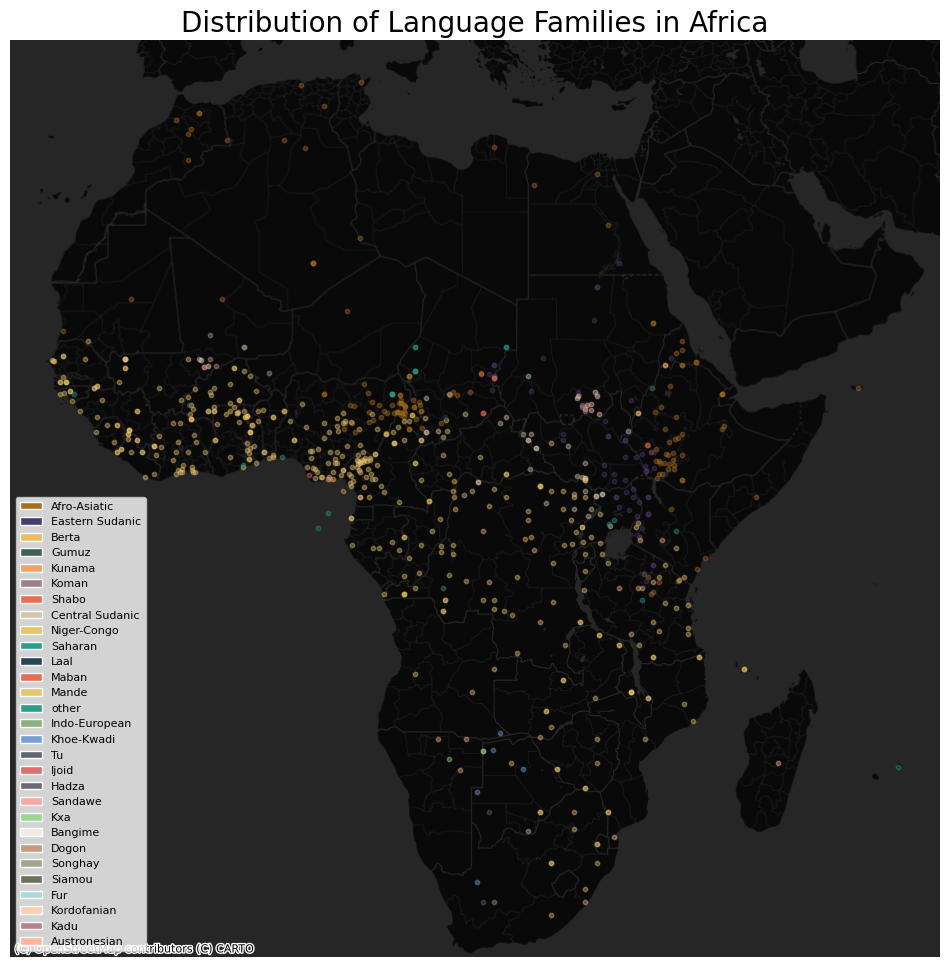

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from matplotlib.colors import ListedColormap

# Define a color palette
# This is a list of colors, you can customize it as you wish
color_palette = ['#A76F1F',  # Deep Earth Orange
    '#4A3B6A',  # Dark Lavender
    '#EDBC64',  # Sunlight Yellow
    '#3A6351',  # Pine Green
    '#F4A261',  # Sandy Brown
    '#9D8189',  # Dusty Rose
    '#E76F51',  # Burnt Sienna
    '#D8C3A5',  # Earthy Tan
    '#E9C46A',  # Saffron
    '#2A9D8F',  # Teal
    '#264653',  # Dark Slate
    '#E76F51',  # Persimmon
    '#E9C46A',  # Ochre
    '#2A9D8F',  # Aquamarine
    '#8AB17D',  # Sage Green
    '#77A1D3',  # Soft Blue
    '#5E6472',  # Steel Gray
    '#E56B6F',  # Salmon Pink
    '#6D6875',  # Heather
    '#F4A9A8',  # Soft Pink
    '#99D98C',  # Pastel Green
    '#F2E9E4',  # Off White
    '#CB997E',  # Beige
    '#A5A58D',  # Olive Drab
    '#6B705C',  # Moss Green
    '#A8DADC',  # Light Blue Green
    '#FFCDB2',  # Light Coral
    '#B5838D',  # Mauve
    '#FFB4A2',  # Apricot
                 ]

# Create a colormap based on the color palette
cmap = ListedColormap(color_palette)

africa.crs = "EPSG:4326"
africa = africa.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1, figsize=(12, 15))

# Plot each family using the colors from the palette
unique_families = africa['Family'].unique()
for idx, family in enumerate(unique_families):
    family_data = africa[africa['Family'] == family]
    family_data.plot(ax=ax, markersize=10, alpha=0.4, color=color_palette[idx % len(color_palette)], label=family)

# Add the base map without labels
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterNoLabels)

# Add title and legend
ax.set_title('Distribution of Language Families in Africa', fontdict={'fontsize': 20}, loc='center')

# Create a custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_palette[i % len(color_palette)], edgecolor='white', label=family) for i, family in enumerate(unique_families)]
ax.legend(handles=legend_elements, prop={'size': 8}, loc='lower left')

# Remove the axis
ax.set_axis_off()

# Display the plot
plt.show()


In [58]:
color_palette = [
    '#393b79',  # Midnight blue
    '#ff7f0e',  # Safety orange
    '#2ca02c',  # Cooked asparagus green
    '#d62728',  # Brick red
    '#9467bd',  # Muted purple
    '#8c564b',  # Chestnut brown
    '#e377c2',  # Raspberry yogurt pink
    '#7f7f7f',  # Middle gray
    '#bcbd22',  # Curry yellow-green
    '#17becf',  # Blue-teal
    '#b5cf6b',  # Pear green
    '#637939',  # Olive green
    '#8c6d31',  # Mustard brown
    '#843c39',  # Chestnut red
    '#ad494a',  # Brick red
    '#d6616b',  # Pale red
    '#e7969c',  # Mauve pink
    '#7b4173',  # Purple
    '#a55194',  # Medium purple
    '#ce6dbd',  # Soft purple
    '#de9ed6',  # Light purple
    '#3182bd',  # Strong blue
    '#e6550d',  # Bright orange
    '#fdae6b',  # Peach orange
    '#31a354',  # Jungle green
    '#756bb1',  # Lavender
    '#9e9ac8',  # Pale lavender
    '#1f77b4',  # Muted blue
    '#c7e9c0',  # Light green
]

In [59]:
africa.info

<bound method DataFrame.info of     ID_language Name_language Macroarea   Latitude  Longitude Glottocode  \
0           aar          Aari    Africa   6.000000  36.583333   aari1239   
1           abo        Arbore    Africa   5.000000  36.750000   arbo1245   
2           amh       Amharic    Africa  10.000000  38.000000   amha1245   
3           any         Anywa    Africa   8.000000  33.500000   anua1242   
4           awn         Awngi    Africa  10.833333  36.666667   awng1244   
..          ...           ...       ...        ...        ...        ...   
727         rnd         Rundi    Africa  -3.500000  30.000000   rund1242   
728         ses       Sesotho    Africa -28.000000  27.000000   sout2807   
729         som        Somali    Africa   3.000000  45.000000   soma1255   
730         soq       Soqotri    Africa  12.500000  54.000000   soqo1240   
731         swt         Swati    Africa -26.500000  31.000000   swat1243   

    ISO639P3code           Family    Subfamily         

In [77]:
africa_gdf['size']

0      3
1      9
2      6
3      2
4      2
      ..
727    1
728    1
729    1
730    1
731    1
Name: size, Length: 732, dtype: int64

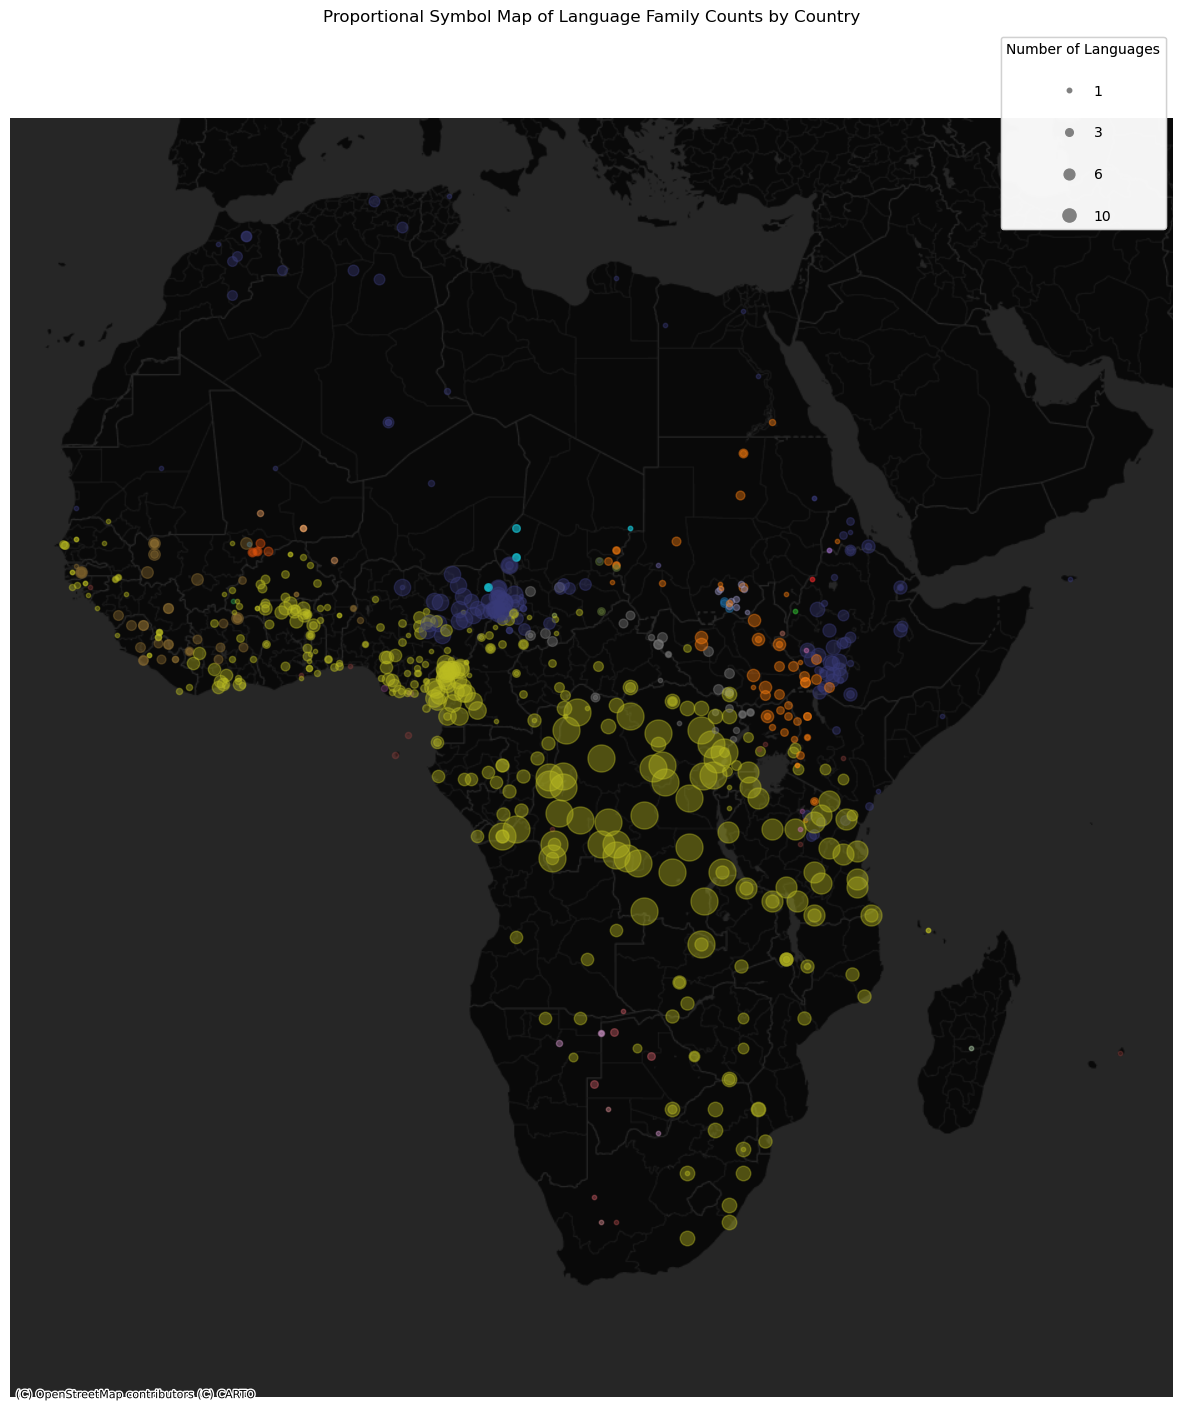

In [84]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import contextily as ctx


example_sizes = [10, 30, 60, 90]  # These should match typical 'size' values in your 'africa_gdf'
size_labels = ['1', '3', '6', '10']  # Labels should match the 'size' values


# Create a list of legend patches using Line2D to represent the marker sizes
size_legend_patches = [
    Line2D([0], [0], marker='o', color='gray', label=label,
           markersize=size**0.5, linestyle='None')
    for size, label in zip(example_sizes, size_labels)
]

# Create a colormap from the new color palette
cmap = ListedColormap(color_palette)

# Map each family to a unique color from the palette
family_colors = {family: color_palette[i % len(color_palette)] for i, family in enumerate(africa_gdf['Family'].unique())}

# Add a 'color' column to your GeoDataFrame
africa_gdf['color'] = africa_gdf['Family'].map(family_colors)

# Set a scaling factor for the size of the symbols
scaling_factor = 10  # Adjust as needed

# Apply the scaling factor to the 'counts' to define the size of the symbols
africa_gdf['size'] = africa_gdf['counts'] * scaling_factor

# Start plotting
fig, ax = plt.subplots(figsize=(15, 20))

# Plot each point with the assigned color and size
for _, row in africa_gdf.iterrows():
    ax.scatter(
        x=row.geometry.x, 
        y=row.geometry.y,
        s=row['size'],
        color=row['color'],
        alpha=0.4
    )

# Create a legend for the colors
legend_elements = [Patch(facecolor=color, edgecolor='k', label=family) for family, color in family_colors.items()]
ax.legend(handles=legend_elements, loc='lower left', title='Language Families', bbox_to_anchor=(1, 0.5))
# Add the scale of symbol sizes to the legend
size_legend = ax.legend(handles=size_legend_patches, loc='upper right', title='Number of Languages', labelspacing=2)
ax.add_artist(size_legend)  # Ensure the size legend remains on the plot alongside any existing legends


# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterNoLabels)
y_min, y_max = ax.get_ylim()
y_padding = (y_max - y_min) * 0.1  # Adjust padding to 10% of the range
ax.set_ylim(y_min - y_padding, y_max + y_padding)
ax.set_title('Proportional Symbol Map of Language Family Counts by Country')
ax.axis('off')
plt.savefig("language_distribution_map.png", dpi=300)  # Save as PNG
plt.savefig("language_distribution_map.svg")  # Save as SVG
plt.show()